# Exploration of samplewise expression variance within different input sets

The aim of this script is to explore the distribution of the variance of genes across different samples and test whether genes with highest variances are relatively stable within train and test data

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import ceil

In [2]:
column_index_file = os.listdir("/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/gene_level_gene_variance/")
npy_files = [file for file in column_index_file if file.endswith('.npy')]

In [3]:
npy_files = [os.path.join("/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/gene_level_gene_variance/", path) for path in npy_files]

In [4]:
npy_files

['/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/gene_level_gene_variance/gene_level_no_zscore_normalization_train_variance_descending_sorted_index.npy',
 '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/gene_level_gene_variance/gene_level_no_zscore_normalization_test_variance_descending_sorted_index.npy',
 '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/gene_level_gene_variance/gene_level_with_zscore_normalization_train_variance_descending_sorted_index.npy',
 '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/gene_level_gene_variance/gene_level_with_zscore_normalization_test_variance_descending_sorted_index.npy']

In [5]:
no_zscore_train = np.load(npy_files[0], allow_pickle=True)
no_zscore_test = np.load(npy_files[1], allow_pickle=True)
zscore_train = np.load(npy_files[2], allow_pickle=True)
zscore_test = np.load(npy_files[3], allow_pickle=True)
    

In [6]:
def count_same_elements_at_same_positions(*lists):
    # Initialize the counter
    count = 0

    # Use zip to iterate over lists in parallel
    for elements in zip(*lists):
        # Check if all elements in this position are the same
        if all(element == elements[0] for element in elements):
            count += 1

    return count


In [7]:
whole_list_length = len(no_zscore_test)

## Compare between those with and without zscores

In [8]:
print("There are {} percents of genes following the same order between train data sets with and without zscores"\
    .format(round(count_same_elements_at_same_positions(no_zscore_train, zscore_train)/whole_list_length*100,3)))

There are 0.291 percents of genes following the same order between train data sets with and without zscores


In [9]:
print("There are {} percents of genes following the same order between test data sets with and without zscores"\
    .format(round(count_same_elements_at_same_positions(no_zscore_test, zscore_test)/whole_list_length*100,3)))

There are 0.304 percents of genes following the same order between test data sets with and without zscores


## Compare between train and test sets with the same normalization strategies

In [10]:
print("There are {} percents of genes following the same order between train data set and test data set without zscore"\
    .format(round(count_same_elements_at_same_positions(no_zscore_train, no_zscore_test)/whole_list_length*100,3)))

There are 0.411 percents of genes following the same order between train data set and test data set without zscore


In [11]:
print("There are {} percents of genes following the same order between train data set and test data set with zscore"\
    .format(round(count_same_elements_at_same_positions(zscore_train, zscore_test)/whole_list_length*100,3)))

There are 0.368 percents of genes following the same order between train data set and test data set with zscore


The exact order of the genes are quite different given the nature of the data sets. However, what matters the most is whether those genes follow more or less in the same range (genes with high variance are always in that range and so it is with those middle variance and low variance genes).
Because we have a gene list of roughly a few hundred genes, it would be meaningful to check the distribution of the results based on a split of 100 genes to see how well the gene matches in this round 

In [25]:
def count_overlapped_elements_in_lists(*lists):
    # Convert the first list to a set
    common_elements = set(lists[0])

    # Find intersection with the sets of the remaining lists
    for lst in lists[1:]:
        common_elements &= set(lst)

    # The length of common_elements is the count of overlapped elements
    return len(common_elements)

## Compare between those with and without zscores

In [27]:
bins_range = 100
bins_num = ceil(whole_list_length/bins_range)
average_coverage_set1 = []
average_coverage_set2 = []

In [28]:
for i in range(bins_num):
    if i != bins_num:
        overlapped_elements_set1 = count_overlapped_elements_in_lists(
            no_zscore_train[100*i:100*(i+1)], zscore_train[100*i:100*(i+1)])/100
        overlapped_elements_set2 = count_overlapped_elements_in_lists(
            no_zscore_test[100*i:100*(i+1)], zscore_test[100*i:100*(i+1)])/100
        
    else: 
        overlapped_elements_set1 = count_overlapped_elements_in_lists(
            no_zscore_train[100*i:len(no_zscore_train)], 
            zscore_train[100*i:len(zscore_train)])/(len(no_zscore_train)-100*i)
        overlapped_elements_set2 = count_overlapped_elements_in_lists(
            no_zscore_test[100*i:len(no_zscore_test)], 
            zscore_test[100*i:len(zscore_test)])/(len(no_zscore_test)-100*i)
        
    average_coverage_set1.append(overlapped_elements_set1)
    average_coverage_set2.append(overlapped_elements_set2)
        

(array([109.,  57.,  32.,  15.,   4.,   6.,   6.,   1.,   2.,   2.]),
 array([0.02 , 0.113, 0.206, 0.299, 0.392, 0.485, 0.578, 0.671, 0.764,
        0.857, 0.95 ]),
 <BarContainer object of 10 artists>)

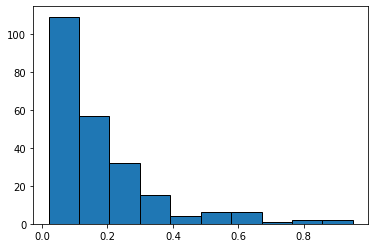

In [32]:
plt.hist(average_coverage_set1, bins=10, edgecolor='black')

(array([113.,  58.,  28.,  14.,   4.,   5.,   7.,   0.,   3.,   2.]),
 array([0.02 , 0.113, 0.206, 0.299, 0.392, 0.485, 0.578, 0.671, 0.764,
        0.857, 0.95 ]),
 <BarContainer object of 10 artists>)

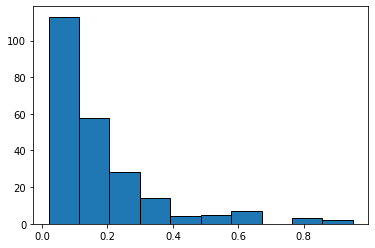

In [33]:
plt.hist(average_coverage_set2, bins=10, edgecolor='black')

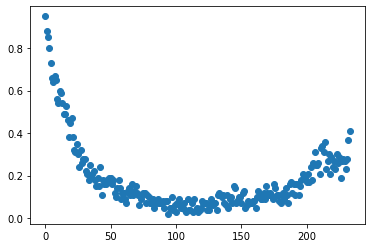

In [36]:
plt.scatter(range(len(average_coverage_set1)), average_coverage_set1)

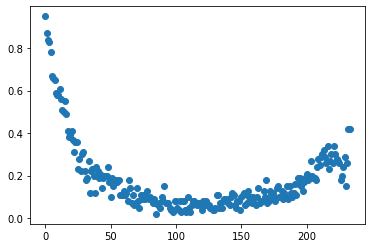

In [37]:
plt.scatter(range(len(average_coverage_set2)), average_coverage_set2)

## Compare between train and test sets with the same normalization strategies

In [39]:
bins_range = 100
bins_num = ceil(whole_list_length/bins_range)
average_coverage_set1 = []
average_coverage_set2 = []

In [40]:
for i in range(bins_num):
    if i != bins_num:
        overlapped_elements_set1 = count_overlapped_elements_in_lists(
            no_zscore_train[100*i:100*(i+1)], no_zscore_test[100*i:100*(i+1)])/100
        overlapped_elements_set2 = count_overlapped_elements_in_lists(
            zscore_train[100*i:100*(i+1)], zscore_test[100*i:100*(i+1)])/100
        
    else: 
        overlapped_elements_set1 = count_overlapped_elements_in_lists(
            no_zscore_train[100*i:len(no_zscore_train)], 
            no_zscore_test[100*i:len(zscore_train)])/(len(no_zscore_train)-100*i)
        overlapped_elements_set2 = count_overlapped_elements_in_lists(
            zscore_train[100*i:len(no_zscore_test)], 
            zscore_test[100*i:len(zscore_test)])/(len(no_zscore_test)-100*i)
        
    average_coverage_set1.append(overlapped_elements_set1)
    average_coverage_set2.append(overlapped_elements_set2)

(array([68., 90., 41.,  6., 13.,  5.,  2.,  5.,  1.,  3.]),
 array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.7 , 0.79, 0.88, 0.97]),
 <BarContainer object of 10 artists>)

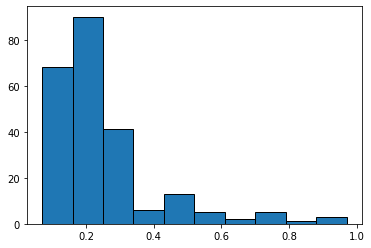

In [41]:
plt.hist(average_coverage_set1, bins=10, edgecolor='black')

(array([93., 76., 30., 10.,  7.,  8.,  3.,  3.,  1.,  3.]),
 array([0.09 , 0.177, 0.264, 0.351, 0.438, 0.525, 0.612, 0.699, 0.786,
        0.873, 0.96 ]),
 <BarContainer object of 10 artists>)

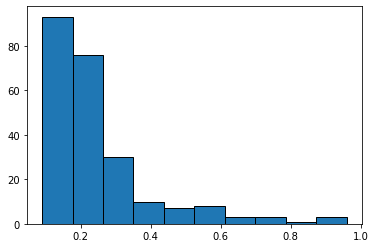

In [42]:
plt.hist(average_coverage_set2, bins=10, edgecolor='black')

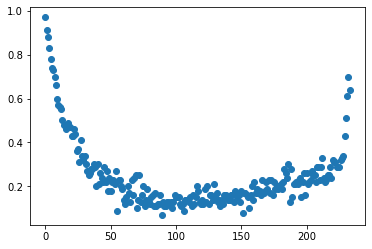

In [43]:
plt.scatter(range(len(average_coverage_set1)), average_coverage_set1)

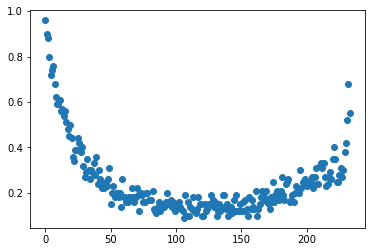

In [44]:
plt.scatter(range(len(average_coverage_set2)), average_coverage_set2)

The most highly expressed genes and most lowly expressed genes are stable across samples and robust to normalization, which is not surprising. When we run the new pathway permutation, we should take this into consideration -- we should take the same setting at least for training and testing, so that would be important we not to get too involved with the genes with middle expression levels since these might behave differently in training and testing. 